In [1]:
import cx_Oracle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
plt.rc('font', family = 'Malgun Gothic') # 한글 입력
plt.rcParams['axes.unicode_minus'] = False # 글꼴 변경시 마이너스 표기 가능으로 처리

In [40]:
con = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql = '''select L.고객번호,성별,연령대,기,구매시간,sum(구매금액),T.고객구분,
ROW_NUMBER() OVER (PARTITION BY L.고객번호 ORDER BY sum(구매금액) DESC) AS RankNo
from lcl2 L
JOIN 고정고객 T ON L.고객번호=T.고객번호
where (기='7기' or 기='1기')
group by L.고객번호,성별,연령대,기, 구매시간, T.고객구분
order by L.고객번호,기,rankno'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['고객번호','성별','연령대','기','구매시간','구매금액','고객구분','랭크']
df = pd.DataFrame(x, columns = columns)
cursor.close()
con.commit()

In [41]:
df

,고객번호,성별,연령대,기,구매시간,구매금액,고객구분,랭크
0,00001,M,60세이상,1기,14,2407240,감소,2
1,00001,M,60세이상,1기,15,1657730,감소,3
2,00001,M,60세이상,1기,12,1428740,감소,5
3,00001,M,60세이상,1기,11,1132830,감소,7
4,00001,M,60세이상,1기,13,892550,감소,8
...,...,...,...,...,...,...,...,...
399077,19337,M,20세~24세,7기,12,29610,증가,10
399078,19337,M,20세~24세,7기,15,27290,증가,11
399079,19337,M,20세~24세,7기,16,19090,증가,12
399080,19337,M,20세~24세,7기,17,16610,증가,13


In [42]:
df_1_down=df.loc[(df.기=='1기') & (df.고객구분=='감소')]
df_1_up=df.loc[(df.기=='1기') & (df.고객구분=='증가')]
df_7_down=df.loc[(df.기=='7기') & (df.고객구분=='감소')]
df_7_up=df.loc[(df.기=='7기') & (df.고객구분=='증가')]

Text(0.5, 1.0, '7기 증가')

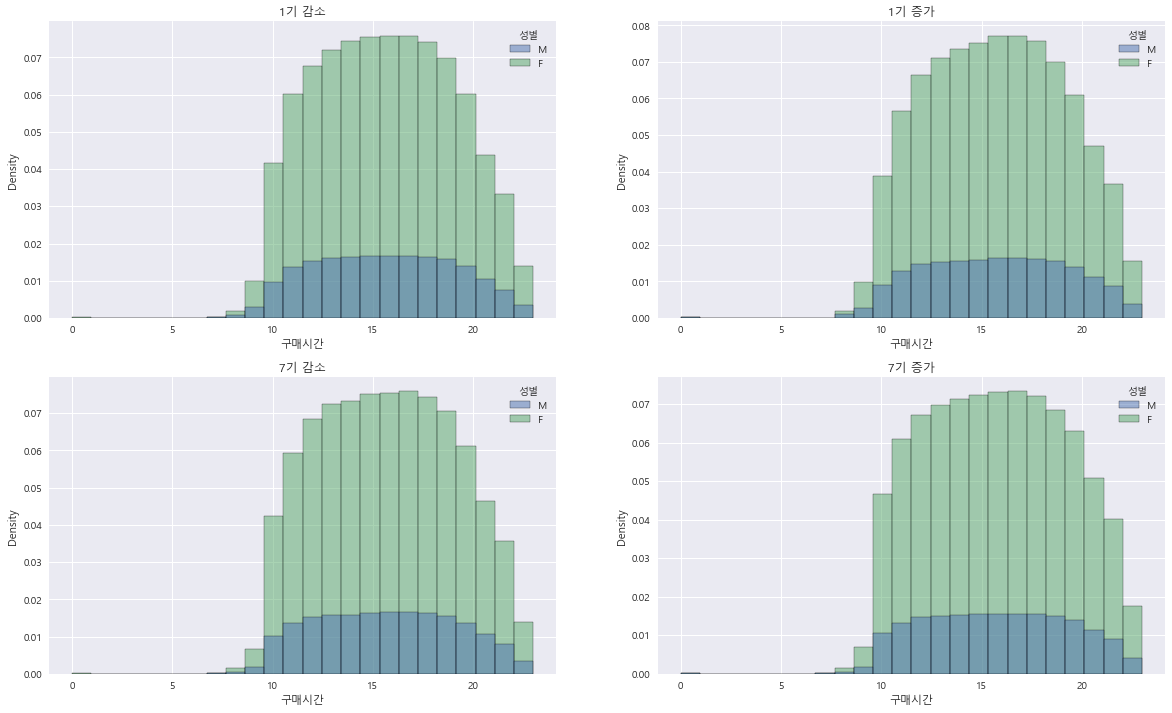

In [45]:
bin=24
# max=9000
plt.figure(figsize=(20,12))
plt.subplot(2, 2, 1) 
sns.histplot(data=df_1_down,x='구매시간',bins=bin,hue='성별',stat = 'density')
# plt.ylim(0,max)
plt.title('1기 감소')

plt.subplot(2, 2, 2) 
sns.histplot(data=df_1_up,x='구매시간',bins=bin,hue='성별',stat = 'density')
# plt.ylim(0,max)
plt.title('1기 증가')

plt.subplot(2, 2, 3) 
sns.histplot(data=df_7_down,x='구매시간',bins=bin,hue='성별',stat = 'density')
# plt.ylim(0,max)
plt.title('7기 감소')

plt.subplot(2, 2, 4) 
sns.histplot(data=df_7_up,x='구매시간',bins=bin,hue='성별',stat = 'density')
# plt.ylim(0,max)
plt.title('7기 증가')